In [2]:
!pip install tensorflow==2.12

In [3]:
!pip install opencv-python

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob
import sklearn as skl
from sklearn.model_selection import train_test_split
import cv2
import os
import random
%matplotlib inline
import glob
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential

2025-06-10 18:51:26.695979: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-10 18:51:27.020718: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-10 18:51:27.022048: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-10 18:51:28.130999: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Primera red neuronal convolucional de 10 capas incluyendo Flatten y los maxpool.

In [ ]:
img_size = (224, 224)



#/content/drive/MyDrive/BD-Ephemeroptera/preprocesadas_numpy
paths ={
        'Betidae':'/home/julio/Documentos/TEST_TESIS/PracticasTesisKeras/CNN-VAE_Curso/db/Beatidae//recdirect*.jpg',
        'Canidae':'/home/julio/Documentos/TEST_TESIS/PracticasTesisKeras/CNN-VAE_Curso/db/Canidae/recdirect/*.jpg',
        'Heptageniidae':'/home/julio/Documentos/TEST_TESIS/PracticasTesisKeras/CNN-VAE_Curso/db/Heptageniidae/recdirect/*.jpg',
        'Leptohyphidae':'/home/julio/Documentos/TEST_TESIS/PracticasTesisKeras/CNN-VAE_Curso/db/Leptohyphidae/recdirect/*.jpg',
        'Leptophlebiidae':'/home/julio/Documentos/TEST_TESIS/PracticasTesisKeras/CNN-VAE_Curso/db/Leptophlebiidae/recdirect/*.jpg'
        }
# Separar en entrenamiento y prueba

X = []
y = []
label_map = {}
label_counter = 0
max_per_class = 500

for label, path in paths.items():
    archivos = glob.glob(path)
    print(f"{label}: {len(archivos)} archivos encontrados")

    if len(archivos) > max_per_class:
        archivos = random.sample(archivos, max_per_class)
    if label not in label_map:
        label_map[label] = label_counter
        label_counter += 1

    for archivo in archivos:
        datos = np.load(archivo)
        if datos.shape != (224, 224, 3):
            print(f"Saltando archivo con forma {datos.shape}")
            continue
        X.append(datos)
        y.append(label_map[label])

X = np.array(X)
y = np.array(y)

print(f"Forma final de X: {X.shape}")
print(f"Forma final de y: {y.shape}")

Betidae: 0 archivos encontrados
Canidae: 0 archivos encontrados
Heptageniidae: 0 archivos encontrados
Leptohyphidae: 0 archivos encontrados
Leptophlebiidae: 0 archivos encontrados
Forma final de X: (0,)
Forma final de y: (0,)


In [5]:
import glob
import random
import numpy as np
import cv2  # Asegúrate de tener opencv-python instalado
img_size = (224, 224)

paths = {
    'Betidae':'/home/julio/Documentos/TEST_TESIS/PracticasTesisKeras/CNN-VAE_Curso/db/Beatidae/recdirect/*.jpg',
    'Canidae':'/home/julio/Documentos/TEST_TESIS/PracticasTesisKeras/CNN-VAE_Curso/db/Canidae/recdirect/*.jpg',
    'Heptageniidae':'/home/julio/Documentos/TEST_TESIS/PracticasTesisKeras/CNN-VAE_Curso/db/Heptageniidae/recdirect/*.jpg',
    'Leptohyphidae':'/home/julio/Documentos/TEST_TESIS/PracticasTesisKeras/CNN-VAE_Curso/db/Leptohyphidae/recdirect/*.jpg',
    'Leptophlebiidae':'/home/julio/Documentos/TEST_TESIS/PracticasTesisKeras/CNN-VAE_Curso/db/Leptophlebiidae/recdirect/*.jpg'
}

X = []
y = []
label_map = {}
label_counter = 0
max_per_class = 500
target_size = (224, 224)

for label, path in paths.items():
    archivos = glob.glob(path)
    print(f"{label}: {len(archivos)} archivos encontrados")

    if len(archivos) > max_per_class:
        archivos = random.sample(archivos, max_per_class)

    if label not in label_map:
        label_map[label] = label_counter
        label_counter += 1

    for archivo in archivos:
        img = cv2.imread(archivo)  # Lee la imagen como BGR
        if img is None:
            print(f"⚠️ No se pudo leer {archivo}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB
        img = cv2.resize(img, target_size)
        X.append(img)
        y.append(label_map[label])

X = np.array(X, dtype=np.uint8)
y = np.array(y)

print(f"✅ Forma final de X: {X.shape}")
print(f"✅ Forma final de y: {y.shape}")
print(f"🧭 Mapeo de etiquetas: {label_map}")

Betidae: 510 archivos encontrados
Canidae: 1380 archivos encontrados
Heptageniidae: 901 archivos encontrados
Leptohyphidae: 415 archivos encontrados
Leptophlebiidae: 84 archivos encontrados
✅ Forma final de X: (1999, 224, 224, 3)
✅ Forma final de y: (1999,)
🧭 Mapeo de etiquetas: {'Betidae': 0, 'Canidae': 1, 'Heptageniidae': 2, 'Leptohyphidae': 3, 'Leptophlebiidae': 4}


In [6]:
print(X[0])
print(y[0])

[[[ 56  64  77]
  [ 52  60  73]
  [ 55  62  78]
  ...
  [207 209 169]
  [205 211 167]
  [205 211 167]]

 [[ 54  62  75]
  [ 55  63  76]
  [ 58  65  81]
  ...
  [207 209 169]
  [205 210 169]
  [205 211 167]]

 [[ 53  61  74]
  [ 55  63  76]
  [ 58  65  81]
  ...
  [207 209 169]
  [207 209 169]
  [207 209 169]]

 ...

 [[218 218 184]
  [219 219 185]
  [219 219 185]
  ...
  [241 242 211]
  [241 241 213]
  [241 241 213]]

 [[218 218 180]
  [218 218 180]
  [219 219 183]
  ...
  [241 241 213]
  [242 242 214]
  [242 242 214]]

 [[219 220 180]
  [219 220 180]
  [219 219 181]
  ...
  [242 242 214]
  [242 242 214]
  [242 242 214]]]
0


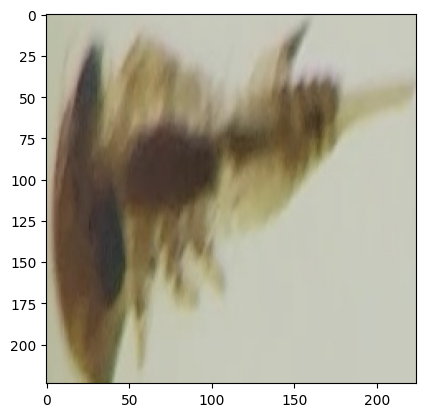

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

plt.imshow(X_train[10])


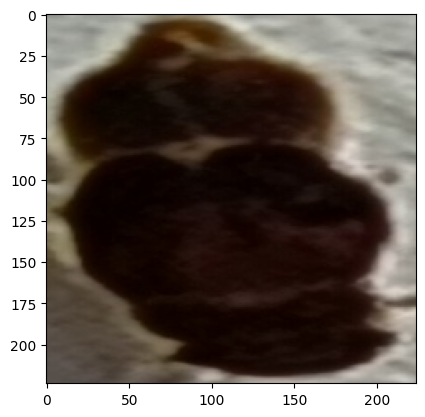

In [16]:
plt.imshow(X_train[20])

#**ResNet50 de Tensorflow**

In [ ]:
base_model = tf.keras.applications.resnet.ResNet50(include_top=False, weights=None, input_shape=(224,224,3))

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
model = Sequential()
regularizer = tf.keras.regularizers.l2(0.001)
model.add(base_model)
model.add(Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=60, activation='relu', kernel_regularizer= regularizer))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 60)                7740      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 3

In [14]:
model = tf.keras.models.load_model('/home/julio/Documentos/TEST_TESIS/PracticasTesisKeras/CNN-VAE_Curso/TestFile/SegundaBD_ResNet50_50Epochs.h5')
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

history = model.fit(X_train, y_train, epochs= 20, batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

Epoch 1/20
50/50 [==============================] - 232s 4s/step - loss: 0.4704 - sparse_categorical_accuracy: 0.8630
Epoch 2/20
50/50 [==============================] - 221s 4s/step - loss: 0.3679 - sparse_categorical_accuracy: 0.8699
Epoch 3/20
50/50 [==============================] - 216s 4s/step - loss: 0.3751 - sparse_categorical_accuracy: 0.8774
Epoch 4/20
50/50 [==============================] - 214s 4s/step - loss: 0.2835 - sparse_categorical_accuracy: 0.9043
Epoch 5/20
50/50 [==============================] - 213s 4s/step - loss: 0.4269 - sparse_categorical_accuracy: 0.8574
Epoch 6/20
50/50 [==============================] - 213s 4s/step - loss: 0.3764 - sparse_categorical_accuracy: 0.8793
Epoch 7/20
50/50 [==============================] - 216s 4s/step - loss: 0.2710 - sparse_categorical_accuracy: 0.9068
Epoch 8/20
50/50 [==============================] - 218s 4s/step - loss: 0.3421 - sparse_categorical_accuracy: 0.8856
Epoch 9/20
50/50 [==============================] - 219s

In [15]:
model_name = 'SegundaBD_ResNet50_100Epochs.h5'
tf.keras.models.save_model(model, model_name)

In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [17]:
tflite_model = converter.convert()
with open("tf_model2.tflite", "wb") as f:
  f.write(tflite_model)

2025-06-11 14:11:19.972594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2025-06-11 14:11:19.984296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,60]
	 [[{{node inputs}}]]
2025-06-11 14:11:22.040958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2025-06-11 14:11:

INFO:tensorflow:Assets written to: /tmp/tmpsbfi1c6w/assets


INFO:tensorflow:Assets written to: /tmp/tmpsbfi1c6w/assets
2025-06-11 14:11:36.942022: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-06-11 14:11:36.942058: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-06-11 14:11:36.942239: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpsbfi1c6w
2025-06-11 14:11:36.973099: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2025-06-11 14:11:36.973117: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpsbfi1c6w
2025-06-11 14:11:37.117650: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2025-06-11 14:11:38.101509: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpsbfi1c6w
2025-06-11 14:11:38.311270: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 60)                7740      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 3

In [ ]:
#from google.colab import files

#files.download('SegundaBD_ResNet50_20Epochs.h5')
#files.download('tf_model2.tflite')

#**agregamos otras 5 épocas**

In [ ]:
model = tf.keras.models.load_model('Primer_ResNet50.h5')
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

history = model.fit(X_train, y_train, epochs= 5, batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

In [ ]:
model_name = 'Primer_ResNet50_13.h5'
tf.keras.models.save_model(model, model_name)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [ ]:
tflite_model = converter.convert()
with open("tf_model.tflite", "wb") as f:
  f.write(tflite_model)

#**Convolucional:**

In [ ]:
print("corremos la convolucional")
#tf.config.list_physical_devices('GPU')
regularizer = tf.keras.regularizers.l2(0.001)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3, strides =(1,1), padding='same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=5, strides = (1,1), padding = 'same', activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=5, strides = (1,1), padding = 'same', activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=5, strides = (1,1), padding = 'same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(64, kernel_size=5, strides = (1,1), padding = 'same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=5, strides = (1,1), padding = 'same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=5, strides = (1,1), padding = 'same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=60, activation='relu', kernel_regularizer= regularizer))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 5, activation='softmax'))

model.summary()

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

history = model.fit(X_train, y_train, epochs= 8, batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

In [ ]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
#plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Si también usas accuracy:
if 'accuracy' in history.history:
  plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
  plt.plot(history.history['val_accuracy'], label='Precisión de validación')
  plt.xlabel('Épocas')
  plt.ylabel('Precisión')
  plt.title('Precisión durante el entrenamiento')
  plt.legend()
  plt.grid(True)
  plt.show()

**GUARDACIÓN DE PESOS Y BIAS:**

In [ ]:
model_name = 'Primer_CNN_10_capitasBBs.h5'
tf.keras.models.save_model(model, model_name)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [ ]:
tflite_model = converter.convert()
with open("tf_model.tflite", "wb") as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files

files.download('Primer_CNN_10_capitasBBs.h5')
files.download('tf_model.tflite')

#**ResNet50**

modelo de ResNet50 implementado en colab y tensorflow

In [ ]:
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os

#**The Main punto pe ye de la ResNet**

[Detalles del códogo](https://https://www.geeksforgeeks.org/residual-networks-resnet-deep-learning/)

The resnet_layer function creates a ResNet layer with a convolution (Conv2D), optional batch normalization, and activation (e.g., ReLU). The order of these operations depends on the conv_first flag, making it flexible for building ResNet architectures.

In [ ]:
print("corremos ResNet50 para dispositivos móviles")
model = tf.keras.models.Sequential()
batch_size = 32
epochs = 20
data_augmentation = True
num_classes = 5
subtract_pixel_mean = True
n = 3
version = 1

if version ==1:
  depth = n*6+2
elif version ==2:
  depth = n*9+2

model_type = 'ResNet {} dv {} d'.format(depth, version)

#(X_train, y_train), (X_test, y_test) = train_test_split(X, y, test_size=0.2, random_state=53)

input_shape = X_train.shape[1:]

#X_train = X_train.astype('float32')/255
#X_test = X_test.astype('float32')/255

if subtract_pixel_mean:
  X_train_mean = np.mean(X_train, axis =0)
  X_train -= X_train_mean
  X_test -= X_train_mean

print('X_train formilla', X_train.shape)
print(X_train.shape[0], 'Ejemplillo para entrenamiento')
print(X_train.shape[0], 'ejemplillo para prueba')
print('y_train formilla', y_train.shape)

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

#**lr_schedue**

In [ ]:
def lr_schedule(epoch):
  lr = 1e-3
  if epoch >180:
      lr *= 0.5e-3
  elif epoch > 160:
      lr *= 1e-3
  elif epoch >120:
      lr *= 1e-2
  elif epoch > 80:
      lr *= 1e-1
  print('Learning rate: ', lr)
  return lr

#**Capas de resnet**

In [ ]:
def resnet_layer(inputs, num_filters=16,
                 kernel_size =3, strides =1,
                 activation= 'relu', batch_normalization= True,
                 conv_first = True):
  conv = tf.keras.layers.Conv2D(num_filters,
                                kernel_size=kernel_size,
                                strides = strides,
                                padding = 'same', kernel_initializer='he_normal',
                                kernel_regularizer = l2(1e-4))
  x = inputs
  if conv_first:
    x = conv(x)
    if batch_normalization:
      x = BatchNormalization()(x)
    if activation is not None:
      x = Activation(activation)(x)
  else:
    if batch_normalization:
      x = BatchNormalization()(x)
    if activation is not None:
      x = Activation(activation)(x)
      x= conv(x)
  return x

In [ ]:
def resnet_v1(input_shape, depth, num_classes = 5):
  if(depth -2) %6 !=0:
    print("No es correcta esa profundidad, necesita ser de 6n + 2 (eg, 20, 32, 44, etc)")


  num_filters = 16
  num_res_blocks = int((depth-2)/6)

  inputs = Input(shape = input_shape)
  x= resnet_layer(inputs=inputs)
  for stack in range(3):
    for res_block in range(num_res_blocks):
      strides = 2
      if stack >0 and res_block ==0:
        x = resnet_layer(inputs=x,
                         num_filters=num_filters,
                         kernel_size =1,
                         strides = strides,
                         activation = None,
                         batch_normalization = False)
        x = tf.keras.layers.add([x,y])
        x = Activation('relu')(x)
      num_filters *=2
  x = tf.keras.layers.AveragePooling2D(pool_size=8)(x)
  y = Flatten()(x)
  outputs = Dense(num_classes, activation = 'softmax', kernel_initializer = 'he_normal')
  model = Model(inputs=inputs, outputs=outputs)
  return model

In [ ]:
def resnet_v2(input_shape, depth, num_classes = 5):
  if(depth -2) % 9 !=0:
    print('la profundidad debe ser de 9n+2')
  num_filters_in = 16
  num_res_blocks = int((depth-2)/9)
  inputs = Input(input_shape)
  x= resnet_layer(inputs= inputs,
                  num_filters = num_filters_in,
                  conv_first= True)
  for stage in range(3):
    for res_block in range(num_res_blocks):
      activation = 'relu'
      batch_normalization = True
      strides= 1
      if stage ==0:
        num_filters_out = num_filters_in *4
        if res_block ==0:
          activation = None
          batch_normalization = False
        else:
          num_filters_out = num_filters_in *2
          if res_block ==0:
            strides = 2
      y = resnet_layer(inputs= x, num_filters = num_filters_in,
                       strides= strides, activation = activation,
                       batch_normalization = batch_normalization,
                       conv_first = False)
      y = resnet_layer(inputs=y, num_filters=num_filters_in,
                       conv_first = False)
      y = resnet_layer(inputs=y, num_filters = num_filters_out,
                       kernel_size=1,
                       conv_first = False)
      if res_block ==0:
        x = resnet_layer(inputs=x,
                         num_filters= num_filters_out,
                         kernel_size =1,
                         strides = strides,
                         activation =None,
                         batch_normalization = False)
      x = tf.keras.layers.add([x,y])
    num_filters = num_filters_out

    x = BatchNormalization()(x)
    x=Activation('relu')
    x=AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)

    outputs = Dense(num_classes, activation = 'softmax', kernel_initializer = 'he_normal')(y)

    model = Model(inputs= inputs, outputs= outputs)
    return model

In [ ]:
if version == 2:
    model = resnet_v2(input_shape=input_shape, depth=depth)
else:
    model = resnet_v1(input_shape=input_shape, depth=depth)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()
print(model_type)

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'resnet_%s_model.{epoch:03d}.keras' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                              monitor='val_acc',
                              verbose=1,
                              save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Using real-time data augmentation.')
    # Complete the ImageDataGenerator
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        zca_whitening=False,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Fit the generator on the training data
    datagen.fit(X_train)

    # Use the generator for training
    model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
              steps_per_epoch=X_train.shape[0] // batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              callbacks=callbacks)

In [ ]:
model_name = 'Primer_CNN_ResNet.h5'
tf.keras.models.save_model(model, model_name)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("tf_model.tflite", "wb") as f:
  f.write(tflite_model)

from google.colab import files

files.download('Primer_CNN_ResNet.h5')
files.download('tf_model.tflite')

# Inception-v3